# Assignment 5: PCA and Neural Networks (50 marks)
### Due: April 4 at 11:59pm 

### Name: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (20 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [ ]:
# TO DO: Import dataset and inspect the first few columns (1 mark)
data = pd.read_csv('seeds_dataset.txt', sep='\t', header=None)
# Inspect the first few rows
print(data.head())

       0      1       2      3      4      5      6  7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1


Next, you will need to separate the data into your feature matrix and target vector.

In [ ]:
# TO DO: Separate the data into feature matrix and target vector. Print the shape of X and y (1 mark)
X = data.iloc[:, :-1]  # Feature matrix
y = data.iloc[:, -1]   # Target vector
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (210, 7)
Shape of y: (210,)


### Steps 2+3: Preprocessing and Model Selection (3 marks)

The first step is to split the data into training and testing sets.

In [ ]:
# TO DO: Split the data into training and testing sets using 10% for test set (1 mark)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 189
Test set size: 21


Now that we have our training data, we need to decide which preprocessing methods to use. Since we do not want any information leaking into the model validation stage, we will need to create a Pipeline. For this case, our model for the Pipeline is `Logistic Regression(max_iter=1000)`.

In [ ]:
# TO DO: Setup required preprocessing method(s) and model (1 mark)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
# Preprocessing and model setup
scaler = StandardScaler()
model = LogisticRegression(max_iter=1000)

In [ ]:
# TO DO: Setup pipeline (1 mark)
pipeline = Pipeline([
    ('scaler', scaler),
    ('classifier', model)
])

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [ ]:
param_grid = [{'classifier': [LogisticRegression(max_iter=1000)],
              'classifier__C': [0.01, 0.1, 1.0, 10.0, 100],
              'classifier__fit_intercept': [True, False]}]

In [ ]:
#TO DO: Implement the grid search and print the best parameters, training score, cross-validation score and test score (2 marks)
from sklearn.model_selection import GridSearchCV
# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Print results
print(f'Best parameters: {grid_search.best_params_}')
print(f'Training score: {grid_search.best_score_}')
print(f'Test score: {grid_search.score(X_test, y_test)}')

Best parameters: {'classifier': LogisticRegression(max_iter=1000), 'classifier__C': 100, 'classifier__fit_intercept': False}
Training score: 0.9630156472261735
Test score: 0.9523809523809523


### Step 5: Visualize using PCA (5 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [ ]:
# TO DO: Predict target vector labels using best estimator (1 mark)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
# TO DO: Reduce dimensions of test data for plotting (2 marks)
from sklearn.decomposition import PCA
# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

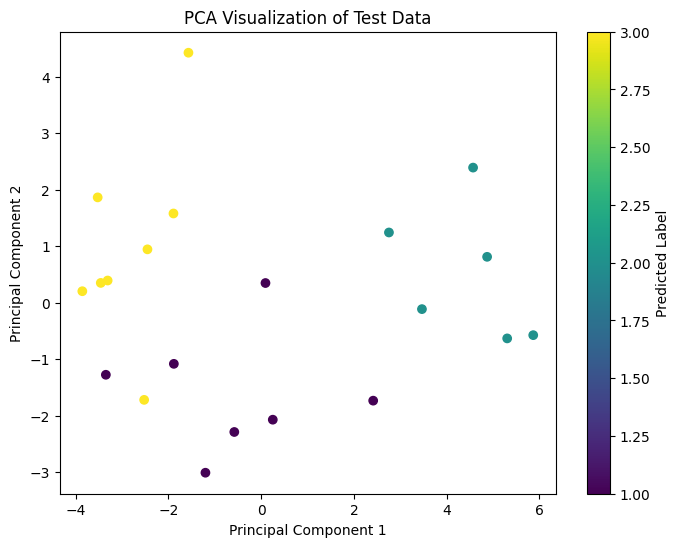

In [ ]:
# TO DO: Plot test points colored by predicted label (2 marks)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis')
plt.colorbar(scatter, label='Predicted Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Test Data')
plt.show()

### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? 
1. Did PCA work well for this model? How does this relate to the results from the model used? 

- 1. Yes the logistic regression model worked well for this dataset because of it's high accuracy on both training and testing score showing good performance and generalization.
- 2. Yes, the PCA worked well as it helped reduced the dimensionality while preserving separability of the classes, which helps support the logistic regression model's performance.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

- The code was sources using a mix of course materials, documentation and generative AI. Steps were completed in order such as data preprocessing, model training, evaluation and visualization. Prompts used with generative AI were used for implementing logistic regression, PCA, and helping with evaluation metrics. Changes were made to fit the projects requirements and fit the dataset. There weren't many challenges in this part as the instructions given were pretty straight forward and the process with that were as well.

## Part 2: Neural Networks (28 marks)

For this assignment, you will be practicing using scikit-learn and TensorFlow to implement basic neural networks (MLP). The dataset we will be using is the energy dataset from Yellowbrick (https://www.scikit-yb.org/en/latest/api/datasets/energy.html).

### Step 1: Load data (1 mark)

You will need to load the file and split it into the feature matrix and target vector. Note that this dataset has two targets, heating load and cooling load. To retrieve the single target dataset, you need `return_dataset=False`. 

In [ ]:
# TO DO: Load dataset into feature matrix and target vector (1 mark)
from yellowbrick.datasets import load_energy
# Load energy dataset
X, y = load_energy(return_dataset=False)
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (768, 8)
Shape of y: (768,)


### Step 2: Process your dataset (6 marks)

In [ ]:
# TO DO: Check if there are any missing values - if yes, decide how to fill them (1 mark)
print(X.isnull().sum())

relative compactness         0
surface area                 0
wall area                    0
roof area                    0
overall height               0
orientation                  0
glazing area                 0
glazing area distribution    0
dtype: int64


In [ ]:
# TO DO: Check data type for each column and the number of unique values - do you need to encode any of them? (1 mark)
print(X.dtypes)
print(X.nunique())
# No need to encode any columns as all are numeric

relative compactness         float64
surface area                 float64
wall area                    float64
roof area                    float64
overall height               float64
orientation                    int64
glazing area                 float64
glazing area distribution      int64
dtype: object
relative compactness         12
surface area                 12
wall area                     7
roof area                     4
overall height                2
orientation                   4
glazing area                  4
glazing area distribution     6
dtype: int64
Data Types:
relative compactness         float64
surface area                 float64
wall area                    float64
roof area                    float64
overall height               float64
orientation                    int64
glazing area                 float64
glazing area distribution      int64
dtype: object

Number of Unique Values:
relative compactness         12
surface area                 12
wall area

In [22]:
# Display the range of each feature
print("Feature Ranges:")
print(X.max() - X.min())

# Check if scaling is needed
if (X.max() - X.min()).max() > 1:
    print("Scaling is recommended as the feature ranges differ significantly.")
else:
    print("Scaling may not be necessary.")

Feature Ranges:
relative compactness           0.36
surface area                 294.00
wall area                    171.50
roof area                    110.25
overall height                 3.50
orientation                    3.00
glazing area                   0.40
glazing area distribution      5.00
dtype: float64
Scaling is recommended as the feature ranges differ significantly.


In [ ]:
# TO DO: Split your data into training and testing sets using 20% for test set (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# TO DO: Implement scaling and/or encoding here if needed (2 marks for preprocessing properly or justifying why it isn't needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# No encoding needed as all features are numeric

### Step 3: Implement Neural Network (MLP) (8 marks)

### Part 1: Use scikit-learn (3 marks)

For each case, you will need to find the predicted target values.

In [ ]:
# TO DO: Test using default parameters and max_iter = 10000 (1 mark)
from sklearn.neural_network import MLPRegressor
mlp_default = MLPRegressor(max_iter=10000, random_state=0)
mlp_default.fit(X_train_scaled, y_train)
y_pred_default = mlp_default.predict(X_test_scaled)

In [ ]:
# TO DO: Test using two hidden layers with 100 nodes each (1 mark)
mlp_two_layers = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=10000, random_state=0)
mlp_two_layers.fit(X_train_scaled, y_train)
y_pred_two_layers = mlp_two_layers.predict(X_test_scaled)

In [ ]:
# TO DO: Test using three hidden layers with 100 nodes each (1 mark)
mlp_three_layers = MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=10000, random_state=0)
mlp_three_layers.fit(X_train_scaled, y_train)
y_pred_three_layers = mlp_three_layers.predict(X_test_scaled)

### Part 2: Use TensorFlow (5 marks)

In [26]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

2025-04-03 03:50:57.985432: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-03 03:50:58.236428: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-03 03:50:58.331792: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743652258.407267    6454 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743652258.432456    6454 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743652258.729255    6454 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Instead of scaling the data using a scikit-learn scaler, you can scale the data using a normalization layer.

In [29]:
# TO DO: Define normalization layer (1 mark)
X_train_array = np.array(X_train)

# Define normalization layer
normalizer = layers.Normalization()
normalizer.adapt(X_train_array)

2025-04-03 03:51:44.282181: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Using `keras.Sequential`, implement an MLP with the same hidden layer setups as above:

In [30]:
# TO DO: Implement MLP with one hidden layer with 100 nodes and the relu activation function (2 marks)
# Compile the model with loss='mean_absolute_error' and optimizer=tf.keras.optimizers.Adam(0.001)
# Fit the model using validation_split=0.2, verbose=0 and epochs=100
model_one_layer = keras.Sequential([
    normalizer,
    layers.Dense(100, activation='relu'),
    layers.Dense(1)
])
model_one_layer.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
model_one_layer.fit(X_train, y_train, validation_split=0.2, verbose=0, epochs=100)

In [31]:
# TO DO: Repeat with two hidden layers with 100 nodes each and the relu activation function (1 mark)
model_two_layers = keras.Sequential([
    normalizer,
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(1)
])
model_two_layers.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
model_two_layers.fit(X_train, y_train, validation_split=0.2, verbose=0, epochs=100)

In [32]:
# TO DO: Repeat with three hidden layers with 100 nodes each and the relu activation function (1 mark)
model_three_layers = keras.Sequential([
    normalizer,
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(1)
])
model_three_layers.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
model_three_layers.fit(X_train, y_train, validation_split=0.2, verbose=0, epochs=100)

### Step 4: Compare the accuracy of both methods (4 marks)

For this part, calculate the mean absolute error for each model and print in a table using pandas

In [33]:
# TO DO: Calculate the MAE for the three scikit-learn tests (1.5 marks)
from sklearn.metrics import mean_absolute_error
mae_default = mean_absolute_error(y_test, y_pred_default)
mae_two_layers = mean_absolute_error(y_test, y_pred_two_layers)
mae_three_layers = mean_absolute_error(y_test, y_pred_three_layers)
print(f'MAE (Default): {mae_default}')
print(f'MAE (Two Layers): {mae_two_layers}')
print(f'MAE (Three Layers): {mae_three_layers}')

MAE (Default): 0.4369349654457015
MAE (Two Layers): 1.8792832881301211
MAE (Three Layers): 0.48261798497386504


In [34]:
# TO DO: Calculate the MAE for the three TensorFlow tests (1.5 marks)
mae_one_layer_tf = model_one_layer.evaluate(X_test, y_test, verbose=0)
mae_two_layers_tf = model_two_layers.evaluate(X_test, y_test, verbose=0)
mae_three_layers_tf = model_three_layers.evaluate(X_test, y_test, verbose=0)
print(f'MAE (One Layer - TF): {mae_one_layer_tf}')
print(f'MAE (Two Layers - TF): {mae_two_layers_tf}')
print(f'MAE (Three Layers - TF): {mae_three_layers_tf}')

MAE (One Layer - TF): 1.8782404661178589
MAE (Two Layers - TF): 1.5791667699813843
MAE (Three Layers - TF): 0.9666634202003479


In [35]:
# TO DO: Print the results (1 mark)
results = pd.DataFrame({
    'Model': ['Default', 'Two Layers', 'Three Layers', 'One Layer (TF)', 'Two Layers (TF)', 'Three Layers (TF)'],
    'MAE': [mae_default, mae_two_layers, mae_three_layers, mae_one_layer_tf, mae_two_layers_tf, mae_three_layers_tf]
})
print(results)

               Model       MAE
0            Default  0.436935
1         Two Layers  1.879283
2       Three Layers  0.482618
3     One Layer (TF)  1.878240
4    Two Layers (TF)  1.579167
5  Three Layers (TF)  0.966663


### Questions (5 marks)

1. Which model produced the least amount of error?
1. Do the results change if you run your code multiple times? Why or why not?
1.  Why are the numbers different between the scikit-learn and TensorFlow methods when we used the same number of hidden layers and hidden units per layer? List two potential reasons.

*ANSWER HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*